In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# CSV File to Load
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
city_data.head()
ride_data.head()

# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, how="outer", on="city")

# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [8]:
#Group data by city name and city type using first value for each city
city_type = pyber_data.groupby("city")["type"].first()
city_type.head()

city
Amandaburgh         Urban
Barajasview         Urban
Barronchester    Suburban
Bethanyland      Suburban
Bradshawfurt        Rural
Name: type, dtype: object

In [9]:
#Group data by city name and average fare
average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [10]:
#Count total rides for each city
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [11]:
#Count total drivers for each city
total_drivers = pyber_data.groupby("city")["driver_count"].first()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [6]:
#Create new dataframe using above calculations
city_data_df = pd.DataFrame ({"Average Fare" : average_fare,
                              "Number of Rides" : total_rides,
                              "Number of Drivers" : total_drivers,
                              "City Type" : city_type
                          })
city_data_df.head()

,Average Fare,Number of Rides,Number of Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


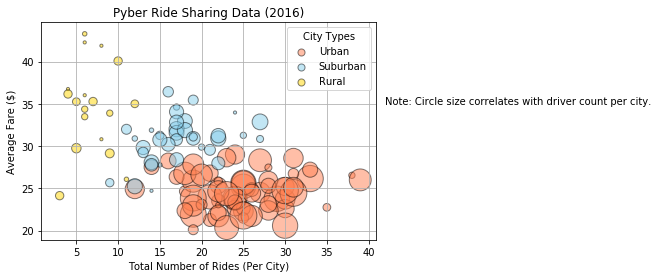

In [19]:
#Sort the data by city type
urban_city = city_data_df[city_data_df["City Type"] == "Urban"]
suburban_city = city_data_df[city_data_df["City Type"] == "Suburban"]
rural_city = city_data_df[city_data_df["City Type"] == "Rural"]

# Build the scatter plots for each city type
urban = plt.scatter(urban_city["Number of Rides"], urban_city["Average Fare"],
                    s = urban_city["Number of Drivers"]*10, label = "Urban",
                    color = "coral", edgecolors = "black", alpha = 0.5) 
suburban = plt.scatter(suburban_city["Number of Rides"], suburban_city["Average Fare"],
                    s = suburban_city["Number of Drivers"]*10, label = "Suburban",
                    color = "skyblue", edgecolors = "black", alpha = 0.5)
rural = plt.scatter(rural_city["Number of Rides"], rural_city["Average Fare"],
                    s = rural_city["Number of Drivers"]*10, label = "Rural",
                    color = "gold", edgecolors = "black", alpha = 0.5) 

# Add grid, title, labels and plot size
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#plt.xlim(0, 40)
#plt.ylim(15, 45)

# Create a legend
legend = plt.legend(handles=[urban, suburban, rural], title="City Types", loc="best")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
    
# Incorporate a text label regarding circle size
plt.text(42,35, "Note: Circle size correlates with driver count per city.")   
    
# Save Figure
plt.savefig('pyber_bubble_plot.png')

# Show figure
plt.show()

## Total Fares by City Type

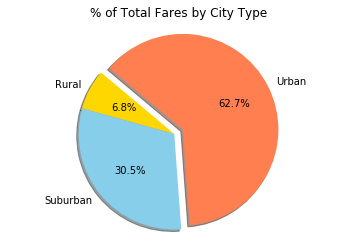

In [40]:
# Calculate Total Fares
total_fares = pyber_data.groupby("type")["fare"].sum()

# Create labels for pie chart
labels = ["Rural", "Suburban", "Urban"]

# Set colors for pie chart
colors = ["gold", "skyblue", "coral"]

# Explode one section of chart
explode = (0, 0, 0.1)

# Create pie chart from above variables
plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create title
plt.title("% of Total Fares by City Type")

# Set axis to show a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig('total_fares.png')

# Show figure
plt.show()

## Total Rides by City Type

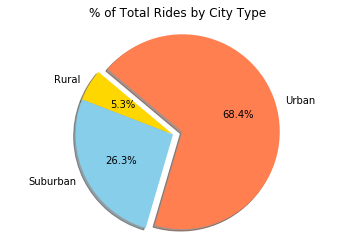

In [15]:
# Calculate Total Rides
total_rides_type = pyber_data.groupby("type")["ride_id"].count()

# Create labels for pie chart
labels = ["Rural", "Suburban", "Urban"]

# Set colors for pie chart
colors = ["gold", "skyblue", "coral"]

# Explode out one section of pie chart
explode = (0, 0, 0.1)

# Create pie chart 
plt.pie(total_rides_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Set title of pie chart
plt.title("% of Total Rides by City Type")

# Set axis to create a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig('total_rides.png')

# Show figure
plt.show()

## Total Drivers by City Type

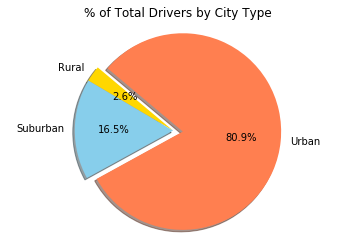

In [20]:
# Calculate Total Drives
total_drivers_type = city_data_df.groupby("City Type")["Number of Drivers"].sum()

# Set labels and attributes for pie chart
labels = ["Rural", "Suburban", "Urban"]

# Set colors
colors = ["gold", "skyblue", "coral"]

# Explode one section of pie
explode = (0, 0, 0.1)

# Create pie chart
plt.pie(total_drivers_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Set title
plt.title("% of Total Drivers by City Type")

# Set axis to show perfect circle
plt.axis("equal")

# Save Figure
plt.savefig('total_drivers.png')

# Show figure
plt.show()